<a href="https://colab.research.google.com/github/Michelleagl/Series_de_Tiempo/blob/main/series_de_tiempo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU


## **Natural Gas** future

In [57]:
futuro = 'NG=F'
ticker = yf.Ticker(futuro)
hist = ticker.history(start= '2012-01-01', end= '2024-01-01', interval='1mo')['Close']

hist

,Close
Date,
2012-02-01 00:00:00-05:00,2.616
2012-03-01 00:00:00-05:00,2.126
2012-05-01 00:00:00-04:00,2.422
2012-06-01 00:00:00-04:00,2.824
2012-08-01 00:00:00-04:00,2.799
...,...
2023-07-01 00:00:00-04:00,2.634
2023-08-01 00:00:00-04:00,2.768
2023-09-01 00:00:00-04:00,2.929


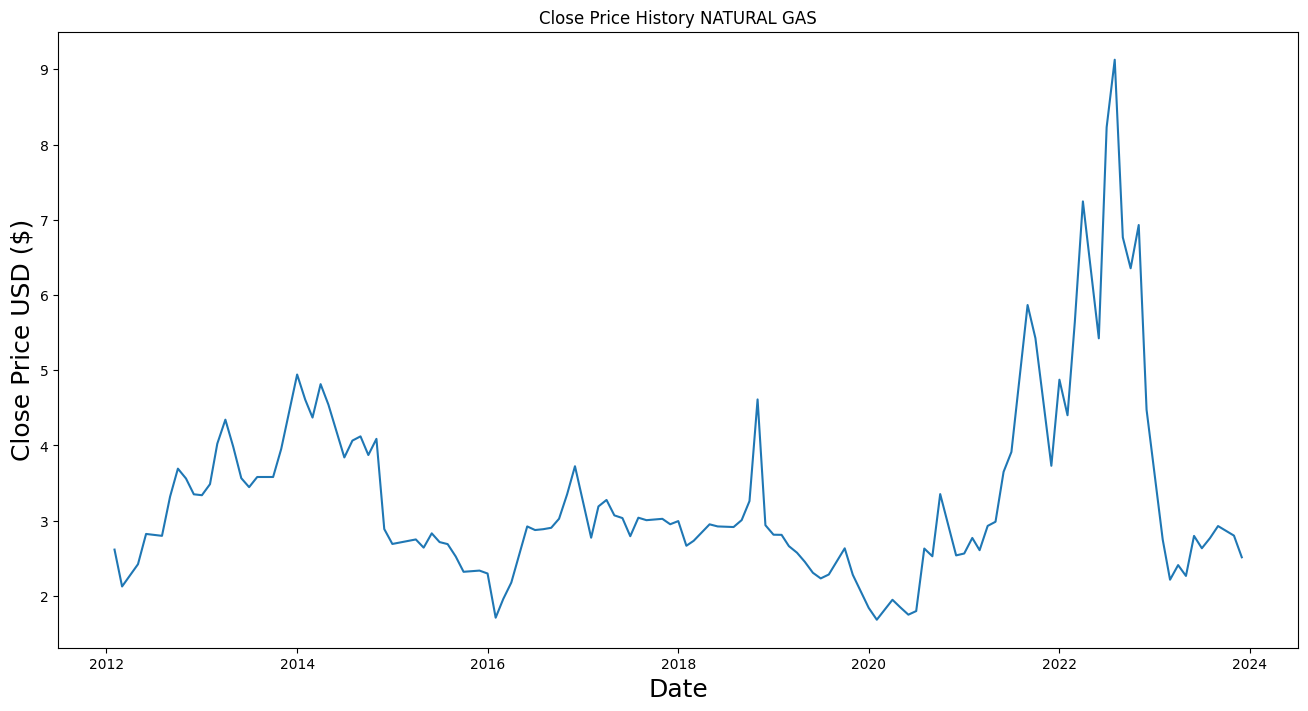

In [58]:
plt.figure(figsize=(16,8))
plt.title('Close Price History NATURAL GAS')
plt.plot(hist)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [76]:
piv_index = getattr(hist.index, 'year')
piv_season = getattr(hist.index, 'month')

piv = pd.pivot_table(hist, index=piv_index, columns=piv_season, values='Close')
piv.plot(figsize=(12,8))

KeyError: 'Close'

In [50]:
hist.head(20)

,Close
Date,
2012-01-03 00:00:00-05:00,2.993
2012-01-04 00:00:00-05:00,3.096
2012-01-05 00:00:00-05:00,2.980
2012-01-06 00:00:00-05:00,3.062
2012-01-09 00:00:00-05:00,3.011
2012-01-10 00:00:00-05:00,2.941
2012-01-11 00:00:00-05:00,2.774
2012-01-12 00:00:00-05:00,2.697
2012-01-13 00:00:00-05:00,2.670


In [ ]:
serie1 = MinMaxScaler(feature_range=(0,1))
scaled_data1 = serie1.fit_transform(hist['Close'].values.reshape(-1,1))

scaled_data1

array([[5.71346420e-01],
       [6.28883768e-01],
       [7.16916060e-01],
       [7.58342867e-01],
       [8.08400483e-01],
       [9.29229049e-01],
       [8.42347559e-01],
       [8.75719165e-01],
       [1.00000000e+00],
       [7.62370605e-01],
       [7.45109264e-01],
       [6.45569639e-01],
       [5.43153079e-01],
       [4.85615595e-01],
       [5.03452268e-01],
       [6.13348697e-01],
       [5.73072554e-01],
       [6.54200173e-01],
       [5.26467207e-01],
       [2.88837675e-01],
       [3.02071279e-01],
       [2.73302605e-01],
       [2.89988477e-01],
       [2.91714611e-01],
       [2.49712334e-01],
       [2.25546593e-01],
       [1.96777920e-01],
       [1.56501708e-01],
       [1.11047162e-01],
       [6.55926170e-02],
       [1.95626706e-02],
       [3.45219968e-03],
       [1.95626706e-02],
       [5.75332318e-04],
       [1.13924030e-01],
       [9.03336900e-02],
       [1.61104709e-02],
       [4.83314128e-02],
       [2.30149389e-02],
       [1.78365914e-01],


In [ ]:
prediction_days = 60

x1 = []
y1 = []

for x in range(prediction_days, len(scaled_data1)):
    x1.append(scaled_data1[x-prediction_days:x, 0])
    y1.append(scaled_data1[x, 0])

x1, y1 = np.array(x1), np.array(y1)
x1 = np.reshape(x1, (x1.shape[0], x1.shape[1], 1))

x1.shape

(64, 60, 1)

In [ ]:
model1 = Sequential()

model1.add(GRU(units=50, return_sequences=True, input_shape=(x1.shape[1], 1)))
model1.add(Dropout(0.2))
model1.add(GRU(units=50, return_sequences=True))
model1.add(Dropout(0.2))
model1.add(GRU(units=50))
model1.add(Dropout(0.2))
model1.add(Dense(units=1))

model1.compile(optimizer='adam', loss='mean_squared_error')
model1.fit(x1, y1, epochs=25, batch_size=32)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - loss: 0.2168
Epoch 2/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 0.1188
Epoch 3/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 0.0529
Epoch 4/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 0.0160
Epoch 5/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 0.0328
Epoch 6/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 0.0369
Epoch 7/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 0.0220
Epoch 8/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 0.0191
Epoch 9/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 0.0166
Epoch 10/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - loss: 0.0240
Epoch 11/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 0.0178
Epoch 12/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 0.0228
Epoch 13/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 0.0139
Epoch 14/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 0.0137
Epoch 15/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 0.0107
Epoch 16/25
2/2 ━━━━━━━━━━━━━━━

In [ ]:
hist_test = ticker.history(start= '2024-01-01', end= '2024-06-30')
actual_price = hist_test['Close'].values

total_dataset = pd.concat((hist['Close'], hist_test['Close']), axis=0)
model_inputs = total_dataset[len(total_dataset) - len(hist_test) - prediction_days:].values
model_inputs = serie1.transform(model_inputs.reshape(-1, 1))

model_inputs

array([[1.14499431e-01],
       [1.20828498e-01],
       [1.54775574e-01],
       [1.70886045e-01],
       [1.78365914e-01],
       [1.08745696e-01],
       [1.12197896e-01],
       [6.67433502e-02],
       [9.03336900e-02],
       [7.88262206e-02],
       [1.04718027e-01],
       [1.01841159e-01],
       [1.24280766e-01],
       [1.36363636e-01],
       [4.48791445e-02],
       [3.62485425e-02],
       [2.24395380e-02],
       [2.61795136e-01],
       [2.39355598e-01],
       [2.05408522e-01],
       [2.64672072e-01],
       [3.26237019e-01],
       [3.56731827e-01],
       [3.63636364e-01],
       [3.52128894e-01],
       [4.17721580e-01],
       [3.89528238e-01],
       [4.63751458e-01],
       [4.42462653e-01],
       [4.83889460e-01],
       [5.29344006e-01],
       [6.04718027e-01],
       [6.76639779e-01],
       [6.30609902e-01],
       [7.28998861e-01],
       [6.22554700e-01],
       [5.43728411e-01],
       [5.84004554e-01],
       [5.28193341e-01],
       [5.73647887e-01],


In [ ]:
x1_test = []

for x in range(prediction_days, len(model_inputs)):
    x1_test.append(model_inputs[x-prediction_days:x, 0])

  x1_test = np.array(x1_test)
  x1_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

  prediction_prices = model1.predict(x_test)
  prediction_prices = serie1.inverse_transform(prediction_prices)

prediction_prices

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 6)

# **META** stock

In [83]:
stock = 'META'
ticker = yf.Ticker(stock)
hist2 = ticker.history(start= '2013-01-01', end= '2023-12-31', interval='1mo')['Close']

hist2

,Close
Date,
2013-01-01 00:00:00-05:00,30.916470
2013-02-01 00:00:00-05:00,27.194118
2013-03-01 00:00:00-05:00,25.527544
2013-04-01 00:00:00-04:00,27.713053
2013-05-01 00:00:00-04:00,24.300066
...,...
2023-08-01 00:00:00-04:00,295.283234
2023-09-01 00:00:00-04:00,299.594360
2023-10-01 00:00:00-04:00,300.652191


In [86]:
# prompt: change index from format 'yyyy-mm-dd 00:00:00-00:00' to 'yyyy-mm-dd'

hist2.index = hist2.index.strftime('%Y-%m-%d')


In [90]:
hist2.index = pd.to_datetime(hist2.index)

In [91]:
hist2

,Close
Date,
2013-01-01,30.916470
2013-02-01,27.194118
2013-03-01,25.527544
2013-04-01,27.713053
2013-05-01,24.300066
...,...
2023-08-01,295.283234
2023-09-01,299.594360
2023-10-01,300.652191


In [92]:
hist2.index

DatetimeIndex(['2013-01-01', '2013-02-01', '2013-03-01', '2013-04-01',
               '2013-05-01', '2013-06-01', '2013-07-01', '2013-08-01',
               '2013-09-01', '2013-10-01',
               ...
               '2023-03-01', '2023-04-01', '2023-05-01', '2023-06-01',
               '2023-07-01', '2023-08-01', '2023-09-01', '2023-10-01',
               '2023-11-01', '2023-12-01'],
              dtype='datetime64[ns]', name='Date', length=132, freq=None)

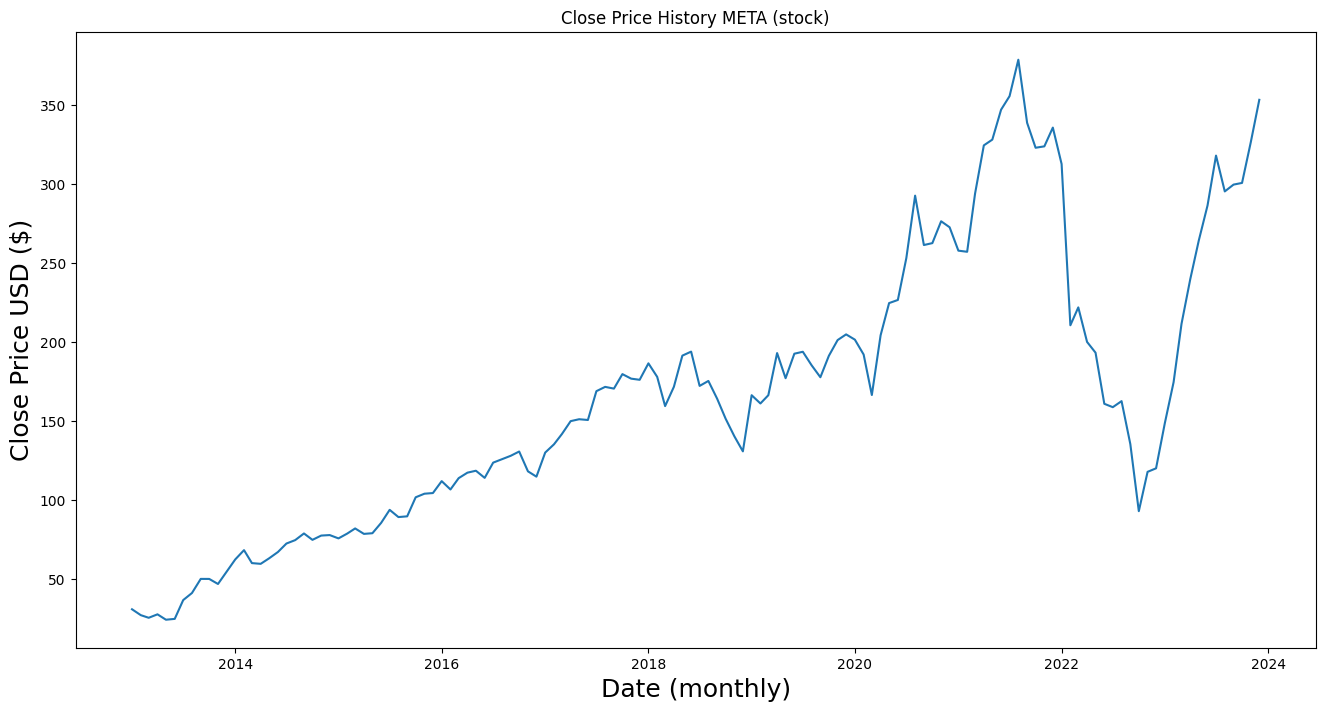

In [93]:
plt.figure(figsize=(16,8))
plt.title('Close Price History META (stock)')
plt.plot(hist2)
plt.xlabel('Date (monthly)', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [94]:
piv_index = getattr(hist2.index, 'year')
piv_season = getattr(hist2.index, 'month')

piv = pd.pivot_table(hist2, index=piv_index, columns=piv_season, values=hist2)
piv.plot(figsize=(12,8))
plt.legend(pd.unique(piv_season))


KeyError: 30.91646957397461

In [ ]:
serie2 = MinMaxScaler(feature_range=(0,1))
scaled_data2 = serie2.fit_transform(hist2['Close'].values.reshape(-1,1))

scaled_data2


array([[0.00992216],
       [0.        ],
       [0.01444694],
       [0.04077877],
       [0.07735951],
       [0.07065393],
       [0.14174383],
       [0.13738259],
       [0.16365956],
       [0.12533432],
       [0.13029524],
       [0.17260044],
       [0.21250679],
       [0.20340237],
       [0.22204717],
       [0.25203137],
       [0.26555155],
       [0.27078537],
       [0.30829271],
       [0.30305922],
       [0.24897867],
       [0.27427436],
       [0.71155394],
       [0.62661661],
       [0.60104833],
       [0.68211473],
       [0.68435003],
       [0.67404627],
       [0.67835316],
       [0.63048737],
       [0.70223145],
       [0.76083712],
       [0.70244968],
       [0.69389041],
       [0.67631741],
       [0.77509768],
       [0.76363692],
       [0.75113937],
       [0.78011844],
       [0.76358224],
       [0.79692756],
       [0.86334479],
       [0.84091474],
       [0.7974187 ],
       [0.82945398],
       [0.91731931],
       [0.88326479],
       [0.761

In [ ]:
x2 = []
y2 = []

for x in range(prediction_days, len(scaled_data2)):
    x2.append(scaled_data1[x-prediction_days:x, 0])
    y2.append(scaled_data1[x, 0])

x2, y2 = np.array(x2), np.array(y2)
x2 = np.reshape(x2, (x2.shape[0], x2.shape[1], 1))

x2.shape

(64, 60, 1)

In [ ]:
model2 = Sequential()

model2.add(GRU(units=50, return_sequences=True, input_shape=(x2.shape[1], 1)))
model2.add(Dropout(0.2))
model2.add(GRU(units=50, return_sequences=True))
model2.add(Dropout(0.2))
model2.add(GRU(units=50))
model2.add(Dropout(0.2))
model2.add(Dense(units=1))

model2.compile(optimizer='adam', loss='mean_squared_error')
model2.fit(x2, y2, epochs=25, batch_size=32)

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 158ms/step - loss: 0.2246
Epoch 2/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 148ms/step - loss: 0.1315
Epoch 3/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 0.0569
Epoch 4/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 0.0209
Epoch 5/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 0.0290
Epoch 6/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - loss: 0.0408
Epoch 7/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - loss: 0.0283
Epoch 8/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 0.0174
Epoch 9/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 0.0166
Epoch 10/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 0.0219
Epoch 11/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 0.0261
Epoch 12/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 0.0166
Epoch 13/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 0.0151
Epoch 14/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 0.0137
Epoch 15/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - loss: 0.0107
Epoch 16/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [77]:
hist2 = ticker.history(start= '2024-01-01', end= '2024-06-30')
actual_price = hist2['Close'].values

total_dataset = pd.concat((hist2['Close'], hist_test['Close']), axis=0)
model_inputs = total_dataset[len(total_dataset) - len(hist_test) - prediction_days:].values
model_inputs = serie1.transform(model_inputs.reshape(-1, 1))

model_inputs



NameError: name 'hist_test' is not defined